# Notes:

This notebook creates the figures from our paper

In [1]:
import os
import sys
import time
import calendar
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy as sp
from scipy import stats
import tensorflow as tf


# Setup

In [2]:
bf_ds_file = "generated_data/bf.csv"
dg_file = "generated_data/dg.csv"
tg_file = "generated_data/tg.csv"


bf_df = pd.read_csv(bf_ds_file, parse_dates=["date"])
bf_df["datetime"] = bf_df["date"]
bf_df

,Unnamed: 0,amount,tcode_num,date_fields,days_passed,age,date,account_id,tcode,description,flag,type,datetime,td,raw_amount
0,0,1139.00,5,12/31,1,-1,2017-04-04,0,Rent__Utility Bill__Debit,Rent,Utility Bill,Debit,2017-04-04,1,-1139.00
1,1,38.50,0,12/31,6,-1,2017-04-10,0,Energy__Utility Bill__Debit,Energy,Utility Bill,Debit,2017-04-10,6,-38.50
2,2,1940.67,1,12/31,5,-1,2017-04-15,0,Monthly__Income__Credit,Monthly,Income,Credit,2017-04-15,5,1940.67
3,3,42.37,10,12/01,5,-1,2017-04-20,0,Gas Station - Car Fuel__Card Transaction__Debit,Gas Station - Car Fuel,Card Transaction,Debit,2017-04-20,5,-42.37
4,4,17.10,8,12/01,1,-1,2017-04-21,0,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,2017-04-21,1,-17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,38.14,0,12/01,0,-1,2017-05-29,4999,Energy__Utility Bill__Debit,Energy,Utility Bill,Debit,2017-05-29,0,-38.14
99996,99996,2127.65,1,12/01,3,-1,2017-06-01,4999,Monthly__Income__Credit,Monthly,Income,Credit,2017-06-01,3,2127.65
99997,99997,18.28,25,12/31,4,-1,2017-06-05,4999,Three Mobile__Utility Bill__Debit,Three Mobile,Utility Bill,Debit,2017-06-05,4,-18.28
99998,99998,57.83,0,12/31,3,-1,2017-06-08,4999,Energy__Utility Bill__Debit,Energy,Utility Bill,Debit,2017-06-08,3,-57.83


In [3]:
real_df = pd.read_csv(f"real_data/final_df--uk.csv", parse_dates=["datetime"])
real_df["days_passed"] = real_df["td"]
real_df

,unnamed: 0,index,account_id,amount,balance,date,description,flag,id,type,...,datetime,month,day,dow,year,dtme,tcode,td,raw_amount,days_passed
0,28979,0,0014d0ef29aa9f93,-45.66,228.34,2017-04-24 11:00:00.000000,Energy,Utility Bill,38a21d894127b49d,Debit,...,2017-04-24 11:00:00,4,24,0,2017,6,Energy__Utility Bill__Debit,0.0,-45.66,0.0
1,30006,1,0014d0ef29aa9f93,2842.27,3070.61,2017-04-24 17:36:55.000000,Monthly,Income,3941e50e4613a49a,Credit,...,2017-04-24 17:36:55,4,24,0,2017,6,Monthly__Income__Credit,0.0,2842.27,0.0
2,32220,2,0014d0ef29aa9f93,-167.25,2903.36,2017-04-25 16:00:00.000000,Credit Card Payment,Credit Card,c09e8105dcfc85b7,Debit,...,2017-04-25 16:00:00,4,25,1,2017,5,Credit Card Payment__Credit Card__Debit,0.0,-167.25,0.0
3,35526,3,0014d0ef29aa9f93,-40.58,2862.78,2017-04-27 16:00:00.000000,Water Bill,Utility Bill,81e4ffc8df86920e,Debit,...,2017-04-27 16:00:00,4,27,3,2017,3,Water Bill__Utility Bill__Debit,2.0,-40.58,2.0
4,94259,4,0014d0ef29aa9f93,-43.16,2819.62,2017-05-23 17:00:00.000000,Energy,Utility Bill,c0ddd8f8a923d40f,Debit,...,2017-05-23 17:00:00,5,23,1,2017,8,Energy__Utility Bill__Debit,26.0,-43.16,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,89757,23,ffd5620bcbf69023,-34.82,2107.16,2017-05-20 15:50:57.000000,Shopping - Household Goods,Card Transaction,908ac96c72f6c3b7,Debit,...,2017-05-20 15:50:57,5,20,5,2017,11,Shopping - Household Goods__Card Transaction__...,0.0,-34.82,0.0
99996,91385,24,ffd5620bcbf69023,-36.50,2070.66,2017-05-22 08:00:00.000000,Water Bill,Utility Bill,66d16692309a0738,Debit,...,2017-05-22 08:00:00,5,22,0,2017,9,Water Bill__Utility Bill__Debit,1.0,-36.50,1.0
99997,91449,25,ffd5620bcbf69023,-38.13,2032.53,2017-05-22 09:00:00,Energy,Utility Bill,b71e06b7164af1e3,Debit,...,2017-05-22 09:00:00,5,22,0,2017,9,Energy__Utility Bill__Debit,0.0,-38.13,0.0
99998,93444,26,ffd5620bcbf69023,-42.59,1989.94,2017-05-22 20:47:15,Bar/Pub,Card Transaction,8a28f7eeff2dbabb,Debit,...,2017-05-22 20:47:15,5,22,0,2017,9,Bar/Pub__Card Transaction__Debit,0.0,-42.59,0.0


In [4]:

dg_df = pd.read_csv(dg_file, parse_dates=["datetime"])
dg_df["tcode"] = dg_df.tcode.apply(lambda x: x.replace("---", "--"))
dg_df.tcode.unique()

array(['BT Mobile__Utility Bill__Debit', 'O2 Mobile__Utility Bill__Debit',
       'Water Bill__Utility Bill__Debit',
       'BT Broadband__Utility Bill__Debit', 'Rent__Utility Bill__Debit',
       'TalkTalk Broadband__Utility Bill__Debit',
       'Energy__Utility Bill__Debit',
       'Credit Card Payment__Credit Card__Debit',
       'Monthly__Income__Credit', 'Vodafone Mobile__Utility Bill__Debit',
       'Graze__Subscription__Debit', 'Four-weekly__Income__Credit',
       'Shopping - Household Goods__Card Transaction__Debit',
       'Next Unilimited__Subscription__Debit',
       'Groceries - Food & Drinks__Card Transaction__Debit',
       'Amazon Prime__Subscription__Debit',
       'Public Transport__Card Transaction__Debit',
       'Mortgage__Utility Bill__Debit',
       'Sky Broadband__Utility Bill__Debit',
       'Gas Station - Car Fuel__Card Transaction__Debit',
       'Weekly__Income__Credit',
       'Tesco Mobile Mobile__Utility Bill__Debit',
       'Restaurant__Card Transaction_

In [5]:

tg_df = pd.read_csv(tg_file, parse_dates=['datetime'])
tg_df["days_passed"] = tg_df["td"]
tg_df

,tcode_num,td,amount,age,account_id,datetime,tcode,description,flag,type,raw_amount,days_passed
0,17,2.0,627.05,-1.0,0,2017-04-06,Mortgage__Utility Bill__Debit,Mortgage,Utility Bill,Debit,-627.05,2.0
1,1,10.0,791.02,-1.0,0,2017-04-16,Monthly__Income__Credit,Monthly,Income,Credit,791.02,10.0
2,1,9.0,1284.78,-1.0,0,2017-04-25,Monthly__Income__Credit,Monthly,Income,Credit,1284.78,9.0
3,1,8.0,1421.59,-1.0,0,2017-05-03,Monthly__Income__Credit,Monthly,Income,Credit,1421.59,8.0
4,1,7.0,1414.32,-1.0,0,2017-05-10,Monthly__Income__Credit,Monthly,Income,Credit,1414.32,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,8,-0.0,5.22,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-5.22,-0.0
99996,8,-0.0,4.30,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-4.30,-0.0
99997,8,-0.0,2.79,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-2.79,-0.0
99998,8,-0.0,1.27,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-1.27,-0.0


# PCA

## Setup

required fields = ["tcode", "amount", "account_id", "days_passed", "age" ] 

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:

s = set()
for df in [real_df, bf_df, dg_df, tg_df]:
    s = s.union( set(list(df.tcode.unique())) )
    

tcode_order =  list(s)
tcode_to_num = lambda x: tcode_order.index(x)
    


tcode_nums_r = real_df["tcode"].apply(tcode_to_num)
tcode_nums_g = bf_df["tcode"].apply(tcode_to_num)
tcode_nums_f = dg_df["tcode"].apply(tcode_to_num)
tcode_nums_t = tg_df["tcode"].apply(tcode_to_num)

In [8]:
oh_r = tf.one_hot(tcode_nums_r, depth=len(tcode_order))
oh_g = tf.one_hot(tcode_nums_g, depth=len(tcode_order))
oh_f = tf.one_hot(tcode_nums_f, depth=len(tcode_order))
oh_t = tf.one_hot(tcode_nums_t, depth=len(tcode_order))

2022-06-29 15:35:59.385217: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
data_r = np.concatenate([np.array(real_df["amount"])[:,None], oh_r.numpy()], axis=1)
data_r.shape

(100000, 45)

In [10]:
data_g = np.concatenate([np.array(bf_df["amount"])[:,None], oh_g.numpy()], axis=1)
data_g.shape

(100000, 45)

In [11]:
data_f = np.concatenate([np.array(dg_df["amount"])[:,None], oh_f.numpy()], axis=1)
data_f.shape

(95228, 45)

In [12]:
data_t = np.concatenate([np.array(tg_df["amount"])[:,None], oh_t.numpy()], axis=1)
data_t.shape

(100000, 45)

In [13]:
tcode_names = tcode_order #[data_encoder.NUM_TO_TCODE[i] for i in range(data_encoder.n_tcodes)]

In [14]:
real_trans_df = pd.DataFrame.from_records(data_r, columns=["amount"] + tcode_names)
real_trans_df["account_id"] = real_df["account_id"]
real_trans_df["age"] = real_df["age"]
real_trans_df["log_amount"] = np.log10(real_trans_df["amount"]+1)

AMOUNT_SCALE = real_trans_df["amount"].std()
LOG_AMOUNT_SCALE = real_trans_df["log_amount"].std()

real_trans_df["amount_sc"] = real_trans_df["amount"] / AMOUNT_SCALE
real_trans_df["log_amount_sc"] = real_trans_df["log_amount"] / LOG_AMOUNT_SCALE

real_trans_df["days_passed"] = real_df["days_passed"]

real_trans_df

/Users/kylenickerson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,amount,Four-weekly__Income__Credit,Vodafone Broadband__Utility Bill__Debit,Water Bill__Utility Bill__Debit,Now TV__Subscription__Debit,BT Mobile__Utility Bill__Debit,Craft Gin Club__Subscription__Debit,Rent__Utility Bill__Debit,Pact Coffee__Subscription__Debit,Public Transport__Card Transaction__Debit,...,Fortnightly__Income__Credit,Shopping - Clothing__Card Transaction__Debit,Restaurant__Card Transaction__Debit,Post Office Broadband__Utility Bill__Debit,account_id,age,log_amount,amount_sc,log_amount_sc,days_passed
0,-45.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,NaN,-0.059686,NaN,0.0
1,2842.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,3.453818,3.715363,4.070526,0.0
2,-167.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,NaN,-0.218626,NaN,0.0
3,-40.58,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,NaN,-0.053045,NaN,2.0
4,-43.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,NaN,-0.056418,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-34.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,NaN,-0.045516,NaN,0.0
99996,-36.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,NaN,-0.047712,NaN,1.0
99997,-38.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,NaN,-0.049843,NaN,0.0
99998,-42.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,NaN,-0.055673,NaN,0.0


In [15]:
bf_trans_df = pd.DataFrame.from_records(data_g, columns=["amount"] + tcode_names)
bf_trans_df["age"] = bf_df["age"]
bf_trans_df["account_id"] = bf_df["account_id"]
bf_trans_df["log_amount"] = np.log10(bf_trans_df["amount"]+1)

bf_trans_df["amount_sc"] = bf_trans_df["amount"] / AMOUNT_SCALE
bf_trans_df["log_amount_sc"] = bf_trans_df["log_amount"] / LOG_AMOUNT_SCALE

bf_trans_df["days_passed"] = bf_df["days_passed"]

bf_trans_df

,amount,Four-weekly__Income__Credit,Vodafone Broadband__Utility Bill__Debit,Water Bill__Utility Bill__Debit,Now TV__Subscription__Debit,BT Mobile__Utility Bill__Debit,Craft Gin Club__Subscription__Debit,Rent__Utility Bill__Debit,Pact Coffee__Subscription__Debit,Public Transport__Card Transaction__Debit,...,Fortnightly__Income__Credit,Shopping - Clothing__Card Transaction__Debit,Restaurant__Card Transaction__Debit,Post Office Broadband__Utility Bill__Debit,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,1139.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,3.056905,1.488880,3.602741,1
1,38.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,1.596597,0.050326,1.881683,6
2,1940.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,3.288175,2.536808,3.875307,5
3,42.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,1.637189,0.055385,1.929523,5
4,17.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,1.257679,0.022353,1.482248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,38.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,1.592621,0.049856,1.876997,0
99996,2127.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,3.328104,2.781225,3.922365,3
99997,18.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,1.285107,0.023895,1.514574,4
99998,57.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,1.769599,0.075594,2.085576,3


In [16]:
dg_trans_df = pd.DataFrame.from_records(data_f, columns=["amount"] + tcode_names)
dg_trans_df["age"] = 0# dg_df["age"]
dg_trans_df["account_id"] = dg_df["account_id"]
dg_trans_df["log_amount"] = np.log10(dg_trans_df["amount"]+1)

dg_trans_df["amount_sc"] = dg_trans_df["amount"] / AMOUNT_SCALE
dg_trans_df["log_amount_sc"] = dg_trans_df["log_amount"] / LOG_AMOUNT_SCALE

dg_trans_df["days_passed"] = dg_df["days_passed"]

dg_trans_df

,amount,Four-weekly__Income__Credit,Vodafone Broadband__Utility Bill__Debit,Water Bill__Utility Bill__Debit,Now TV__Subscription__Debit,BT Mobile__Utility Bill__Debit,Craft Gin Club__Subscription__Debit,Rent__Utility Bill__Debit,Pact Coffee__Subscription__Debit,Public Transport__Card Transaction__Debit,...,Fortnightly__Income__Credit,Shopping - Clothing__Card Transaction__Debit,Restaurant__Card Transaction__Debit,Post Office Broadband__Utility Bill__Debit,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,5.626430,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4973.0,0.821280,0.007355,0.967926,0.0
1,128.154131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,3572.0,2.111108,0.167521,2.488064,0.0
2,189.909265,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4409.0,2.280827,0.248246,2.688088,0.0
3,73.333238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,967.0,1.871183,0.095860,2.205298,0.0
4,118.477428,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,967.0,2.077286,0.154872,2.448203,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95223,87.247266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,1.945701,0.114048,2.293122,1.0
95224,20.894705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,1.340339,0.027313,1.579668,0.0
95225,331.457402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,2.521736,0.433275,2.972013,0.0
95226,347.730192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,2.542490,0.454547,2.996472,0.0


In [17]:
tg_trans_df = pd.DataFrame.from_records(data_t, columns=["amount"] + tcode_names)
tg_trans_df["age"] = 0# dg_df["age"]
tg_trans_df["account_id"] = tg_df["account_id"]
tg_trans_df["log_amount"] = np.log10(tg_trans_df["amount"]+1)

tg_trans_df["amount_sc"] = tg_trans_df["amount"] / AMOUNT_SCALE
tg_trans_df["log_amount_sc"] = tg_trans_df["log_amount"] / LOG_AMOUNT_SCALE

tg_trans_df["days_passed"] = tg_df["days_passed"]

tg_trans_df

,amount,Four-weekly__Income__Credit,Vodafone Broadband__Utility Bill__Debit,Water Bill__Utility Bill__Debit,Now TV__Subscription__Debit,BT Mobile__Utility Bill__Debit,Craft Gin Club__Subscription__Debit,Rent__Utility Bill__Debit,Pact Coffee__Subscription__Debit,Public Transport__Card Transaction__Debit,...,Fortnightly__Income__Credit,Shopping - Clothing__Card Transaction__Debit,Restaurant__Card Transaction__Debit,Post Office Broadband__Utility Bill__Debit,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,627.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.797994,0.819668,3.297599,2.0
1,791.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.898736,1.034007,3.416330,10.0
2,1284.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,3.109167,1.679441,3.664334,9.0
3,1421.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,3.153080,1.858276,3.716089,8.0
4,1414.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,3.150855,1.848773,3.713466,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.793790,0.006823,0.935528,-0.0
99996,4.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.724276,0.005621,0.853601,-0.0
99997,2.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.578639,0.003647,0.681960,-0.0
99998,1.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.356026,0.001660,0.419597,-0.0


In [18]:
real_seq_df = real_trans_df.groupby("account_id").mean()
bf_seq_df = bf_trans_df.groupby("account_id").mean()
dg_seq_df = dg_trans_df.groupby("account_id").mean()
tg_seq_df = tg_trans_df.groupby("account_id").mean()

# Seqpca

In [19]:
cols = tcode_names + ["amount", "days_passed"]

scaler = StandardScaler()

scaled_seqs_r = scaler.fit_transform(real_seq_df[cols])
scaled_seqs_g = scaler.transform(bf_seq_df[cols])
scaled_seqs_f = scaler.transform(dg_seq_df[cols])
scaled_seqs_t = scaler.transform(tg_seq_df[cols])

pca = PCA()

scaled_seqs_r_pc = pca.fit_transform(scaled_seqs_r)

scaled_seqs_g_pc = pca.transform(scaled_seqs_g)
scaled_seqs_f_pc = pca.transform(scaled_seqs_f)
scaled_seqs_t_pc = pca.transform(scaled_seqs_t)

In [20]:


df0 = pd.DataFrame.from_records(scaled_seqs_r_pc[:,:2], columns=["PC1", "PC2"])
df0["src"] = "real"

df1 = pd.DataFrame.from_records(scaled_seqs_g_pc[:,:2], columns=["PC1", "PC2"])
df1["src"] = "gen"

df2 = pd.DataFrame.from_records(scaled_seqs_f_pc[:,:2], columns=["PC1", "PC2"])
df2["src"] = "fgen"


df3 = pd.DataFrame.from_records(scaled_seqs_t_pc[:,:2], columns=["PC1", "PC2"])
df3["src"] = "tg"

pcs_scaled = pd.concat([df0, df1, df2, df3]).reset_index()

### Figure

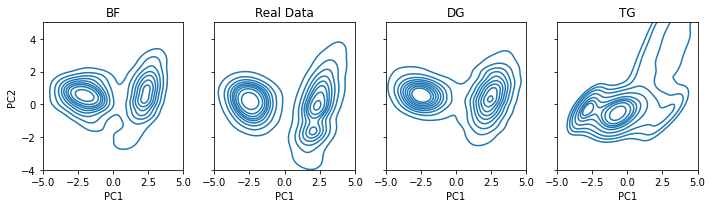

In [21]:
fig, ax = plt.subplots(1,4, figsize=(10,3), sharex=True, sharey=True)
ax[0].set_ylim([-4,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-4,5])
ax[1].set_xlim([-5,5])
ax[2].set_ylim([-4,5])
ax[2].set_xlim([-5,5])
ax[3].set_ylim([-4,5])
ax[3].set_xlim([-5,5])

sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
ax[0].set_title("BF")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
ax[1].set_title("Real Data")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
ax[2].set_title("DG")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2",ax=ax[3])
ax[3].set_title("TG")
plt.tight_layout()

# Cash flow

In [45]:
for df in [real_df, bf_df, tg_df, dg_df]:

    df["month"] = df["datetime"].dt.month
    df["day"]   = df["datetime"].dt.day
    df["dow"]  =  df["datetime"].dt.dayofweek
    df["year"]  = df["datetime"].dt.year
    
    df["amount"] = df["amount"].abs()

In [23]:
gbr = real_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbg = bf_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbfg = dg_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbtg = tg_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()

##### fig

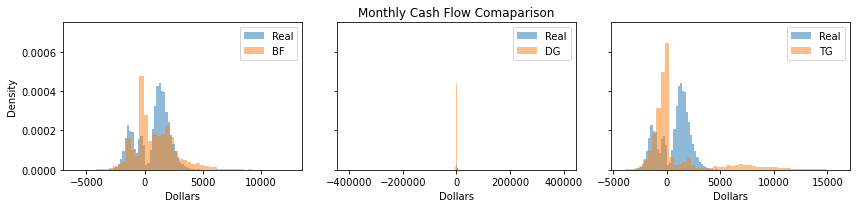

In [31]:
from scipy.stats import wasserstein_distance

fig, ax = plt.subplots(1,3, figsize=(12,3), sharey=True)


for i, (vals, lbl) in enumerate([(gbg, "BF"), (gbfg, "DG"), (gbtg, "TG")]):
    
    
    ax[i].hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
    ax[i].hist(vals.raw_amount, bins=50, label=lbl, density=True, alpha=0.5)
    ax[i].set_ylim([0.0, 0.00075])
    
    if i==1:
        ax[i].set_xlim([-10e5/2.25, 10e5/2.25])
        
    ax[i].legend()
    
    wd = wasserstein_distance(gbr.raw_amount, vals.raw_amount)
    # print("Wasserstein between real and", lbl, "is", wd)
    
ax[1].set_title("Monthly Cash Flow Comaparison")

ax[0].set_ylabel("Density")

ax[0].set_xlabel("Dollars")
ax[1].set_xlabel("Dollars")
ax[2].set_xlabel("Dollars")
    

plt.tight_layout()
plt.show()

# Univariate

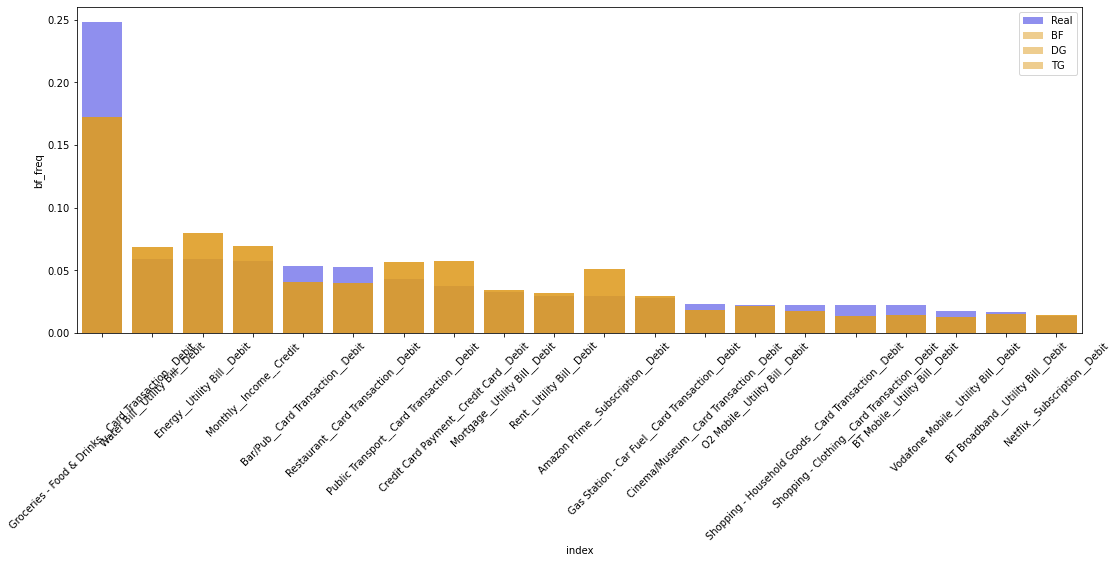

/Users/kylenickerson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


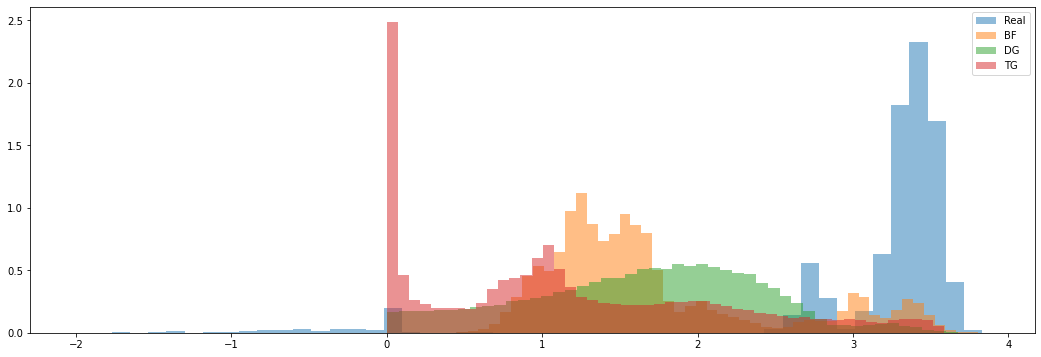

In [32]:
nshow = 20
real_vcs = real_df["tcode"].value_counts()


bf_vcs = bf_df["tcode"].value_counts()

dg_vcs = dg_df["tcode"].value_counts()

tg_vcs = tg_df["tcode"].value_counts()

tcode_counts = pd.merge(real_vcs.reset_index(), 
                        bf_vcs.reset_index(), on='index', how="outer", suffixes=("_real", "_gen")).fillna(0)

tcode_counts = pd.merge(tcode_counts.reset_index(), 
                        dg_vcs.reset_index(), on='index', how="outer", suffixes=("", "_fgen")).fillna(0)
tcode_counts.rename(columns={"tcode":"tcode_fgen"}, inplace=True)

tcode_counts = pd.merge(tcode_counts.drop(columns=['level_0']).reset_index(), 
                        tg_vcs.reset_index(), on='index', how="outer", suffixes=("", "_tg")).fillna(0)
tcode_counts.rename(columns={"tcode":"tcode_tg"}, inplace=True)




tcode_counts["real_freq"] = tcode_counts["tcode_real"] / sum(tcode_counts["tcode_real"])
tcode_counts["bf_freq"] = tcode_counts["tcode_gen"] / sum(tcode_counts["tcode_gen"])
tcode_counts["dg_freq"] = tcode_counts["tcode_fgen"] / sum(tcode_counts["tcode_fgen"])
tcode_counts["tg_freq"]   = tcode_counts["tcode_tg"] / sum(tcode_counts["tcode_tg"])


plt.figure(figsize=(18, 6))
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real") 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="BF")
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="DG")
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="TG")

for item in fig.get_xticklabels():
  item.set_rotation(45)


plt.legend()

plt.show()   


ax, fig = plt.subplots(1,1, figsize=(18, 6))
plt.hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True)
plt.hist(np.log10(bf_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
plt.hist(np.log10(dg_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
plt.hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
plt.legend()

plt.show()   

print("\n"*3)

### Figure

/Users/kylenickerson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


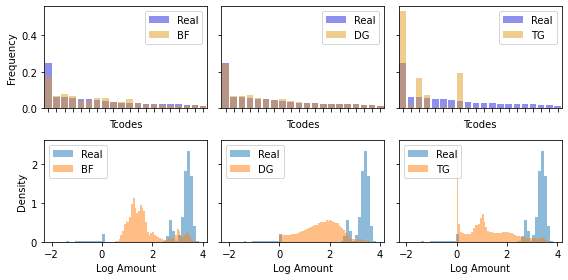

In [33]:
fig, ax = plt.subplots(2,3, figsize=(8,4), sharey="row", sharex="row")



fig.subplots_adjust(hspace=.15) # height spaces
fig.subplots_adjust(wspace=.01) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="dg_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="TG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")





    
###   Bottom row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(bf_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")
ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(dg_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
ax[1, 1].legend()
# ax[1, 1].set_ylabel("Density")


ax[1, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1, 2].set_xlabel("Log Amount")
ax[1, 2].legend()


plt.tight_layout()
plt.show()  

/Users/kylenickerson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


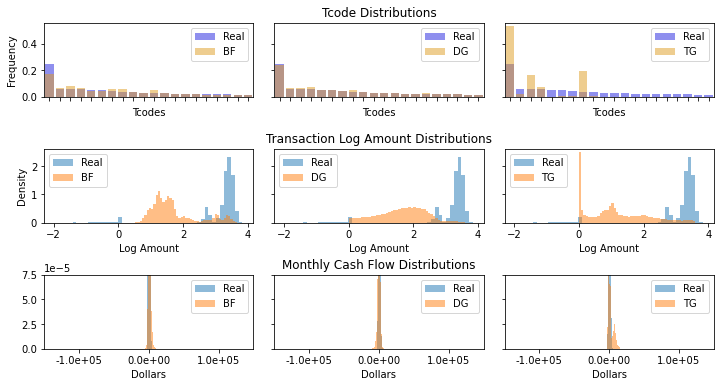

In [34]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(3,3, figsize=(12,6), sharey="row", sharex="row")



fig.subplots_adjust(hspace=.7) # height spaces
fig.subplots_adjust(wspace=.1) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="dg_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="TG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


ax[0, 1].set_title("Tcode Distributions")


# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 
    
###   Mid row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(bf_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")
ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(dg_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
ax[1, 1].legend()
# ax[1, 1].set_ylabel("Density")


ax[1, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1, 2].set_xlabel("Log Amount")
ax[1, 2].legend()

ax[1, 1].set_title("Transaction Log Amount Distributions")


#### Bottom Row (cash flow)  ####


for i, (vals, lbl) in enumerate([(gbg, "BF"), (gbfg, "DG"), (gbtg, "TG")]):
    
    
    ax[2, i].hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
    ax[2, i].hist(vals.raw_amount, bins=50, label=lbl, density=True, alpha=0.5)
    ax[2, i].set_ylim([0.0, 0.000075])
    ax[2, i].set_xlim([-10e4*1.5, 10e4*1.5])
    ax[2, i].set_xlabel("Dollars")
    ax[2, i].legend()
    
    # wd = wasserstein_distance(gbr.raw_amount, vals.raw_amount)
    # print("Wasserstein between real and", lbl, "is", wd)
    
ax[2, 1].set_title("Monthly Cash Flow Distributions")


ax[2, 1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax[2, 1].xaxis.set_major_locator(plt.MaxNLocator(3))

# plt.tight_layout()
plt.show()  

# Joint

### Figure

In [35]:
tcode_counts

,level_0,index,tcode_real,tcode_gen,tcode_fgen,tcode_tg,real_freq,bf_freq,dg_freq,tg_freq
0,0,Groceries - Food & Drinks__Card Transaction__D...,24779,17225,23151.0,53210.0,0.24779,0.17225,0.243111,0.53210
1,1,Water Bill__Utility Bill__Debit,5933,6868,6369.0,1749.0,0.05933,0.06868,0.066882,0.01749
2,2,Energy__Utility Bill__Debit,5917,7952,6187.0,16448.0,0.05917,0.07952,0.064970,0.16448
3,3,Monthly__Income__Credit,5717,6934,7090.0,7020.0,0.05717,0.06934,0.074453,0.07020
4,4,Bar/Pub__Card Transaction__Debit,5316,4061,5081.0,116.0,0.05316,0.04061,0.053356,0.00116
5,5,Restaurant__Card Transaction__Debit,5281,4009,4973.0,587.0,0.05281,0.04009,0.052222,0.00587
6,6,Public Transport__Card Transaction__Debit,4326,5700,4244.0,429.0,0.04326,0.05700,0.044567,0.00429
7,7,Credit Card Payment__Credit Card__Debit,3734,5774,4557.0,19452.0,0.03734,0.05774,0.047854,0.19452
8,8,Mortgage__Utility Bill__Debit,3263,3445,3566.0,706.0,0.03263,0.03445,0.037447,0.00706
9,9,Rent__Utility Bill__Debit,2970,3196,3029.0,0.0,0.02970,0.03196,0.031808,0.00000


###### new fig

Groceries - Food & Drinks__Card Transaction__Debit 0
Water Bill__Utility Bill__Debit 1


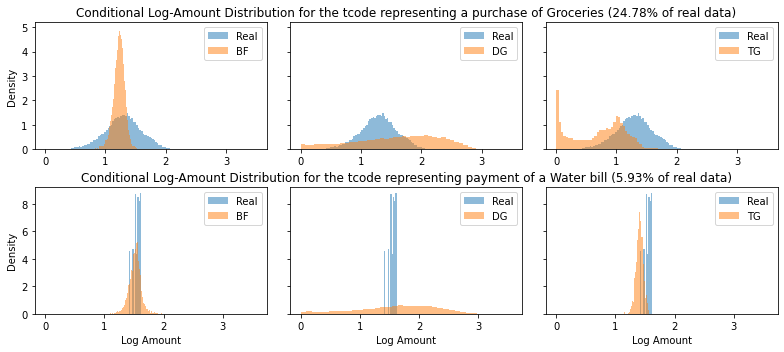

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [50]:
fig, ax = plt.subplots(2,3 , figsize=(11,5), sharey='row', sharex="row")

    # "Day of the Month frequencies for the tcode representing interest credited to the customer",
# interest credited to the customer
titles = [
    "Conditional Log-Amount Distribution for the tcode representing a purchase of Groceries",
    # "Conditional Log-Amount Distribution for the tcode representing an interest payment"
    "Conditional Log-Amount Distribution for the tcode representing payment of a Water bill"
]

len(real_df[real_df['tcode']==tcode].amount.unique())

for i, (ii, tcode, count_r, count_g, count_f, count_t, real_freq, gen_freq, fgen_freq, tg_freq) in tcode_counts.iterrows():
    print(tcode, i)
    plt.figure(figsize=(18,6))
    
    
    percent_of_data = len(real_df[real_df["tcode"]==tcode])/len(real_df)*100
    
    
    title = f"{titles[i]} ({percent_of_data:.2f}% of real data)"

    

    vals_r = np.log10(real_df[real_df["tcode"]==tcode]["amount"]+1)
    vals_g = np.log10(bf_df[bf_df["tcode"]==tcode]["amount"]+1)
    vals_f = np.log10(dg_df[dg_df["tcode"]==tcode]["amount"]+1)
    vals_t = np.log10(tg_df[tg_df["tcode"]==tcode]["amount"]+1)
    
    # tcode= tcode.split("--")[0]
    if i == 0:
        ax[i, 0].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
    else:
        ax[i, 0].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
    ax[i, 0].hist(vals_g, bins='auto', label="BF", alpha=0.5, density=True)
    ax[i, 0].legend()
    
    

    
    if i == 0:
        ax[i, 1].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
    else:
        ax[i, 1].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
    ax[i, 1].hist(vals_f, bins='auto', label="DG", alpha=0.5, density=True)
    ax[i, 1].legend()
    
    
    if i == 0:
        ax[i, 2].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
    else:
        ax[i, 2].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
    ax[i, 2].hist(vals_t, bins='auto', label="TG", alpha=0.5, density=True)
    ax[i, 2].legend()
    



    ax[i,1].set_title(title)


    

    if i > 0: break
    # if i > 1: break
      



ax[1, 0].set_xlabel("Log Amount")
ax[1, 1].set_xlabel("Log Amount")
ax[1, 2].set_xlabel("Log Amount")

ax[0, 0].set_ylabel("Density")
ax[1, 0].set_ylabel("Density")


# ax[1,0].set_ylim([0, 20])
# ax[1,0].set_xlim([0.5, 2.5])

# ax[0,1].set_title()

# plt.tight_layout()
fig.tight_layout(h_pad=0.5, w_pad=2)

plt.show()

# N-grams  

In [51]:
import nltk
from nltk.util import ngrams

In [52]:
def create_ngramcount_df(df, n):
    gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)["tcode"]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1
            
            
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
    df["freqs"] = df["counts"] / sum(df["counts"])

    df.reset_index(inplace=True)
            
    return df

In [53]:
from scipy.spatial import distance

def jensenshannon_diverg(p,q):
    return distance.jensenshannon(p,q, base=2) ** 2

In [54]:
dg_df["datetime"] = pd.to_datetime(dg_df.date)

### Set N  

In [55]:
n = 3
real_ngrams = create_ngramcount_df(real_df, n)
bf_ngrams = create_ngramcount_df(bf_df, n)
dg_ngrams = create_ngramcount_df(dg_df, n)
tg_ngrams = create_ngramcount_df(tg_df, n)

In [56]:
combo_df = pd.merge(real_ngrams, bf_ngrams, on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df =  pd.merge(combo_df, dg_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
"counts":"counts_fgen", "freqs":"freqs_fgen"
})

combo_df =  pd.merge(combo_df, tg_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
"counts":"counts_tg", "freqs":"freqs_tg", "index":"ngram"
})
# , "index":"ngram"
combo_df

,ngram,counts_real,freqs_real,counts_gen,freqs_gen,counts_fgen,freqs_fgen,counts_tg,freqs_tg
0,'Groceries - Food & Drinks__Card Transaction__...,1641.0,0.018233,813.0,0.009033,2180.0,0.025578,42517.0,0.472411
1,'Groceries - Food & Drinks__Card Transaction__...,948.0,0.010533,345.0,0.003833,899.0,0.010548,361.0,0.004011
2,'Groceries - Food & Drinks__Card Transaction__...,912.0,0.010133,387.0,0.004300,933.0,0.010947,36.0,0.000400
3,'Groceries - Food & Drinks__Card Transaction__...,690.0,0.007667,334.0,0.003711,788.0,0.009245,10.0,0.000111
4,'Groceries - Food & Drinks__Card Transaction__...,632.0,0.007022,489.0,0.005433,634.0,0.007439,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
25659,'Groceries - Food & Drinks__Card Transaction__...,0.0,0.000000,0.0,0.000000,0.0,0.000000,6.0,0.000067
25660,"'KCOM Broadband__Utility Bill__Debit', 'Credit...",0.0,0.000000,0.0,0.000000,0.0,0.000000,6.0,0.000067
25661,"'Public Transport__Card Transaction__Debit', '...",0.0,0.000000,0.0,0.000000,0.0,0.000000,2.0,0.000022
25662,"'Post Office Broadband__Utility Bill__Debit', ...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000011


In [57]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_gen"])

0.22477857594963657

In [58]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_fgen"])

0.19405700664820316

### Figure

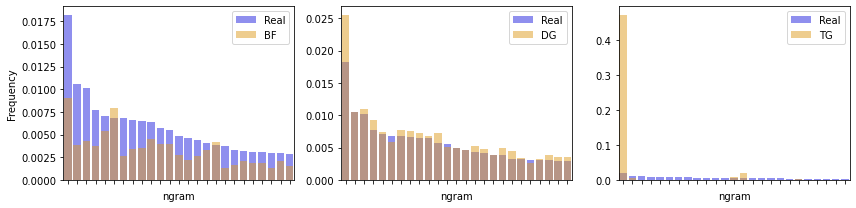

In [63]:

# plt.figure
fig, ax = plt.subplots(1, 3, figsize=(12,3))

barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[0])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_gen", color="orange", alpha=0.5, label="BF", ax=ax[0])


barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("Frequency")


barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[1])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_fgen", color="orange", alpha=0.5, label="DG", ax=ax[1])

barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("")



barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[2])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_tg", color="orange", alpha=0.5, label="TG", ax=ax[2])

barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("")



# plt.title("Distributions of top 30 3-grams (tcodes)")    
plt.legend()
plt.tight_layout()
# fig.subplots_adjust(wspace=.05) 
plt.show()

# Dates

Dows of real transaction with tcode = Groceries - Food & Drinks__Card Transaction__Debit 24.78% of real data
Dows of real transaction with tcode = Water Bill__Utility Bill__Debit 5.93% of real data


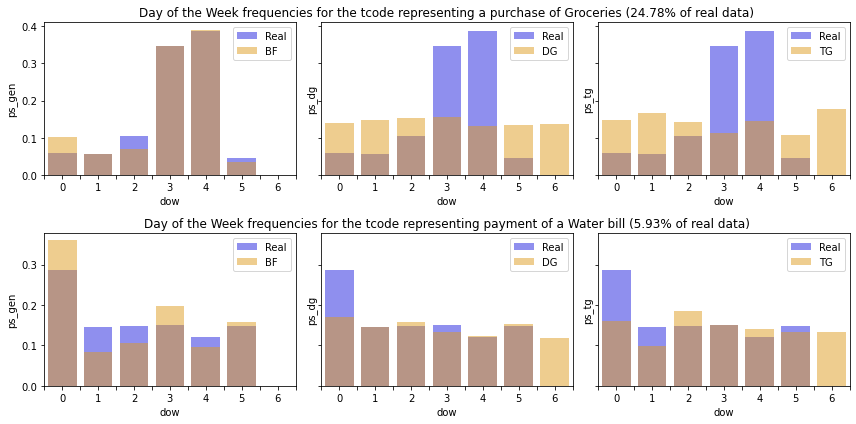

In [66]:
field1 = 'tcode'
field2 = 'dow'
plot_sort_by = "counts_real"
plot_n = 32

rows = 2

fig, ax = plt.subplots(rows,3 , figsize=(12, 3 * rows), sharey='row', sharex="row")


f1_opts = set(real_df[field1].unique()).union(set(bf_df[field1].unique()))




combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    bf_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(dg_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = combo_df_overall["index"]


titles = [
    "Day of the Week frequencies for the tcode representing a purchase of Groceries",
    "Day of the Week frequencies for the tcode representing payment of a Water bill",
]



for i, code_1 in enumerate(f1_opts):
    
    if i == rows:
        break
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        bf_df[bf_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(dg_df[dg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    


    
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    

    # fig, ax = plt.subplots(1,3, figsize = (15, 3))

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[i,0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[i,0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[i,1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[i,2])



    if i < rows - 1:
        for ii in range(3):

            # ax[i, ii].set_xlabel("")
            
            ax[i, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
            ax[i, ii].legend()
        
        
    # tick_lbls = False
    # if not tick_lbls:
    #     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    # else:
    #     for item in barplt.get_xticklabels():
    #         item.set_rotation(90)



    # plt.title(f"Frequencies of top {plot_n} {field2}s")    
    
    percent_of_data = len(real_df[real_df[field1]==code_1])/len(real_df)*100
    title = f"{titles[i]} ({percent_of_data:.2f}% of real data)"
    
    ax[i, 1].set_title(title) 
    # ax[i, 1].set_title(f"Frequencies of transaction day of the month for {code_1}")    
    
    
    
for ii in range(3):

    ax[-1, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
    ax[-1, ii].legend()


plt.tight_layout()
plt.show()